In [1]:
# Useful modules to import
%matplotlib notebook
import sys
import re
import os
import copy
import shutil
import glob
import cv2
from PIL import Image
import numpy as np
import numpy.ma as ma
import math as m
import matplotlib as mpl
#mpl.use('TkAgg')
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import data
from os import listdir, walk
from os.path import isfile

In [4]:
!dir Neptune_moon_images

 Volume in drive C is Windows
 Volume Serial Number is 06DC-3AD5

 Directory of C:\Users\Jimmy_Bainbridge\Desktop\Neptune_moons\Neptune_moon_images

07/12/2018  10:49 AM    <DIR>          .
07/12/2018  10:49 AM    <DIR>          ..
06/12/2018  03:44 AM            49,025 21_56_56.jpg
06/12/2018  03:44 AM            50,411 21_57_45.jpg
06/12/2018  03:44 AM            51,343 21_58_36.jpg
06/12/2018  03:44 AM            51,726 21_59_28.jpg
06/12/2018  03:44 AM            47,464 22_00_19.jpg
06/12/2018  03:44 AM            49,297 22_01_10.jpg
06/12/2018  03:44 AM            49,006 22_02_01.jpg
06/12/2018  03:44 AM            50,703 22_02_54.jpg
06/12/2018  03:44 AM            49,384 22_03_45.jpg
06/12/2018  03:44 AM            50,250 22_04_36.jpg
              10 File(s)        498,609 bytes
               2 Dir(s)  862,799,802,368 bytes free


In [5]:
h = []
for filename in os.listdir('Neptune_moon_images'):
    if filename.endswith(".jpg"):
        h.append(filename)
        #h.extend(filename)
        continue
    else:
        continue

print(h)

['21_56_56.jpg', '21_57_45.jpg', '21_58_36.jpg', '21_59_28.jpg', '22_00_19.jpg', '22_01_10.jpg', '22_02_01.jpg', '22_02_54.jpg', '22_03_45.jpg', '22_04_36.jpg']


In [ ]:
# Load a frame to experiment with
xMoonLst_pix = []
yMoonLst_pix = []
xNepLst_pix = []
yNepLst_pix = []
frmNumLst = []
frmMoon = []
xMoon = []
yMoon = []
xNeptune = []
yNeptune = []
X_pix = []
Y_pix = []
ARTVAR = 1
NEPVAR = 20

for k in range(len(h)):
    
    frameFile = np.array(h)
    imgPIL = Image.open("C:\\Users\\Jimmy_Bainbridge\\Desktop\\Neptune_moons\\Neptune_moon_images\\%s"%frameFile[k])
    frameArr = np.flipud(np.asarray(imgPIL))   # Flip upright
    frameArr = frameArr.astype("f4")           # Convert to float32 for ease
    frameArr = cv2.cvtColor(frameArr, cv2.COLOR_RGB2GRAY)


    #Pixel mask of one image
    mean1 = np.mean(frameArr)
    print(mean1)
    mask = (frameArr > 1.4*mean1)
    #mask += 0.1 * mean1
    fig, ax = plt.subplots()
    ax.imshow(mask)
    plt.show()
    #print(mask.shape)
    print(mean1)
    mask

    #Finding the objects
    label_im, nb_labels = ndimage.label(mask)
    objects = ndimage.find_objects(label_im)
    #print(objects)

    def centroid(data):
        h, w = np.shape(data)
        x = np.arange(0, w)
        y = np.arange(0, h)
        X, Y = np.meshgrid(x, y)
        cx = np.sum(X*data)/np.sum(data)
        cy = np.sum(Y*data)/np.sum(data)
        return cx, cy


    for l in range(len(objects)):
        dx, dy = objects[l]
        xoffset, yoffset = dx.start, dy.start
        submask = mask[objects[l]]
        findobjects = centroid(submask)
        cx, cy = findobjects
        cx += xoffset
        cy += yoffset
        print(cx, cy)
        X_pix.append(cx)
        Y_pix.append(cy)
        size = np.shape(submask)
        print(size)
        width, height = size

        if ARTVAR < width < NEPVAR:
            print("This is a moon")
            xMoonLst_pix.append(cx)
            yMoonLst_pix.append(cy)
            frmNumLst.append(k)
        elif width > NEPVAR:
            xNepLst_pix.append(cx)
            yNepLst_pix.append(cy)
            print("This is Neptune")                                                                                       
        else:
            print("This is an artefact")

13.308154


<IPython.core.display.Javascript object>


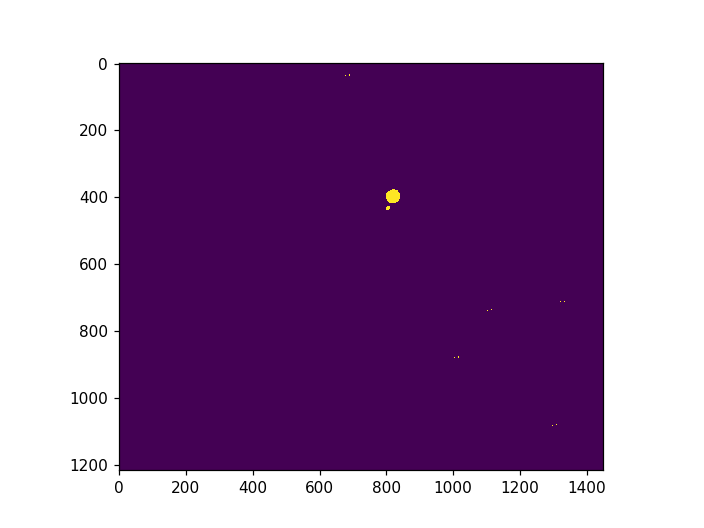

13.308154


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [18]:
#Pixel mask of one image
mean1 = np.mean(frameArr)
print(mean1)
mask = (frameArr > 1.4*mean1)
#mask += 0.1 * mean1
fig, ax = plt.subplots()
ax.imshow(mask)
plt.show()
#print(mask.shape)
print(mean1)
mask